In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

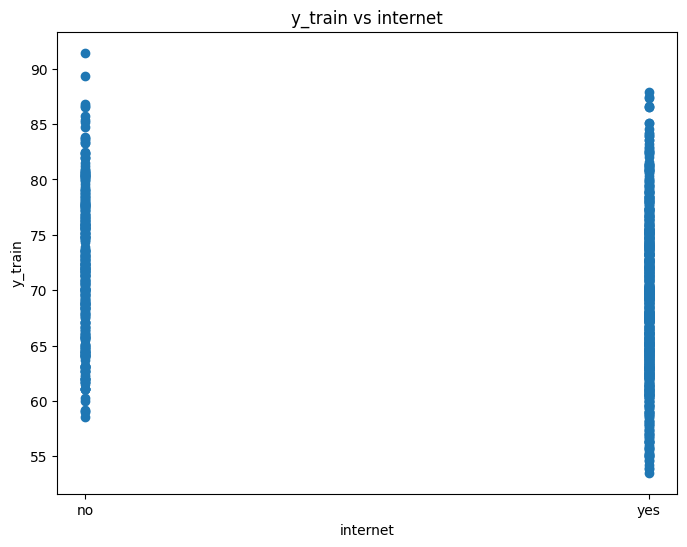

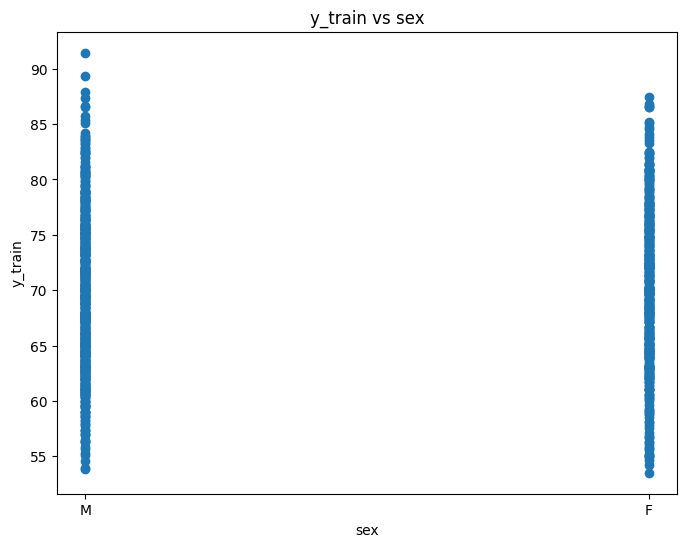

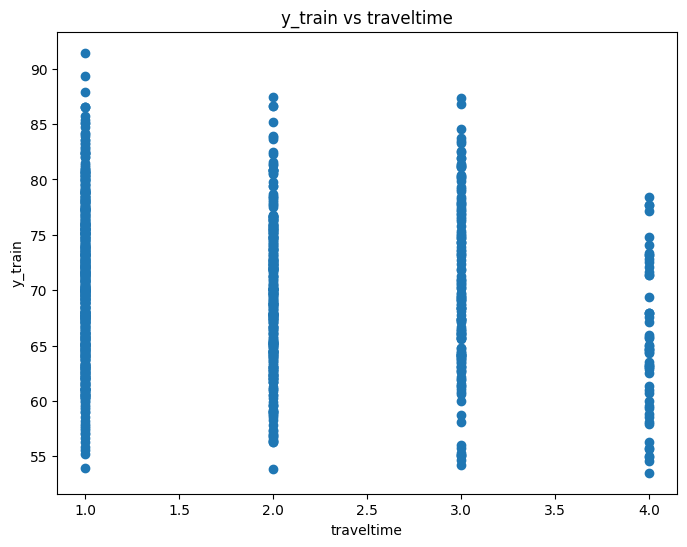

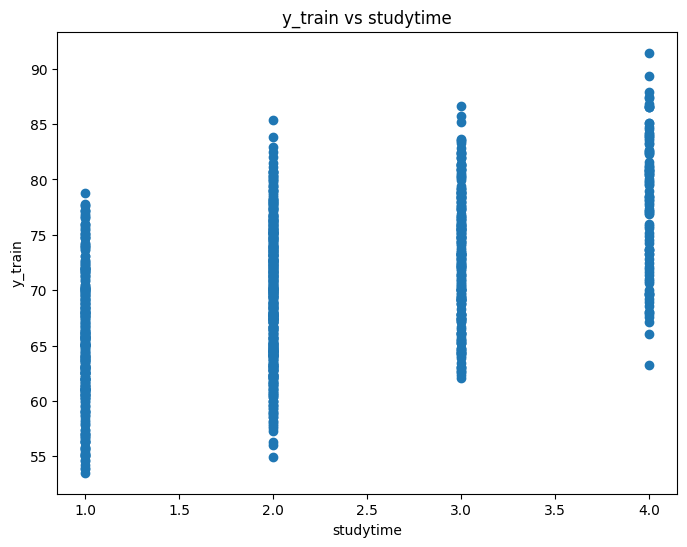

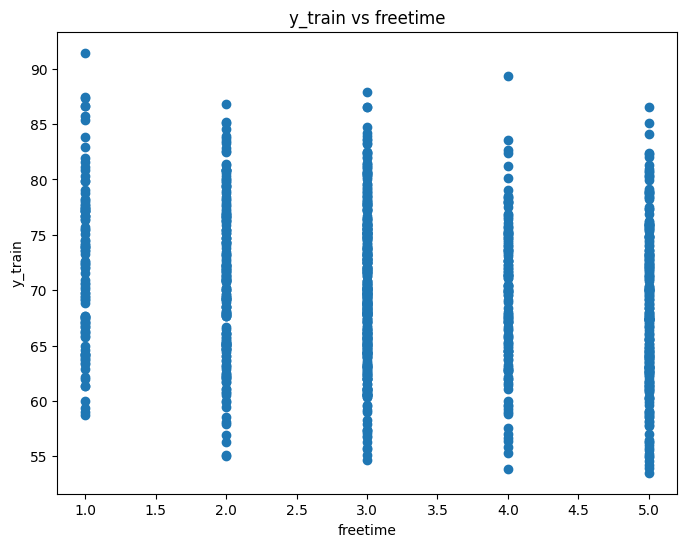

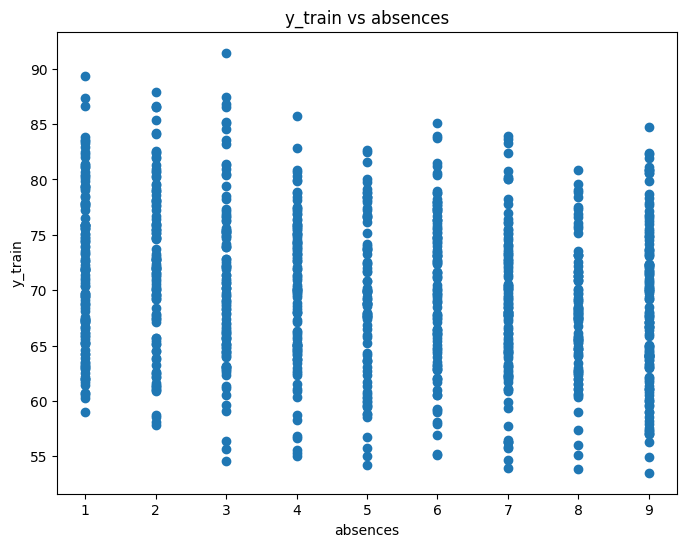

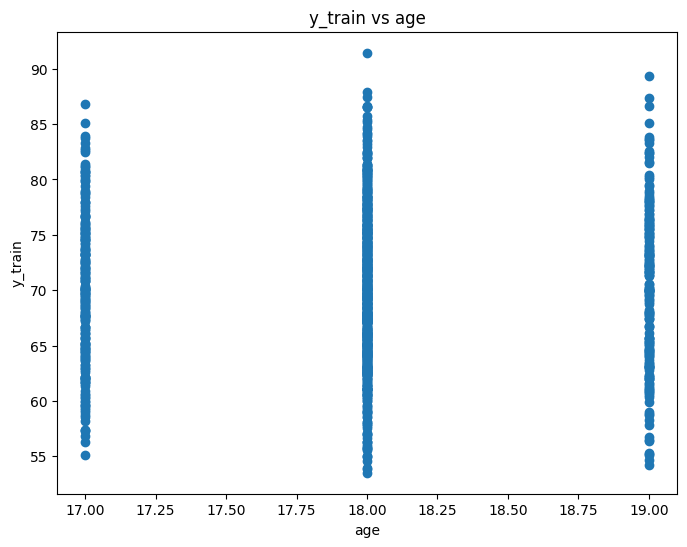

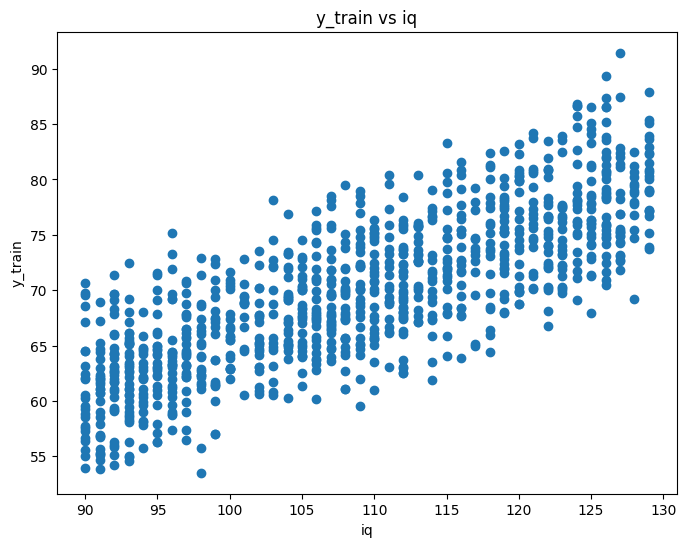

In [34]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/content/drive/MyDrive/LS-ML-Assignment1/linear regression/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
features = data.columns[0:8]
for i in range(x_train.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.plot(x_train[:, i], y_train, 'o')
    plt.xlabel(features[i])
    plt.ylabel('y_train')
    plt.title(f'y_train vs {features[i]}')
    plt.show()
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM


def feature_changing(x_train):
  # ---------
    # Your code here
    for i in range(x_train.shape[1]):
        if x_train[:, i].dtype == 'object':
            column = i
            for j in range(x_train.shape[0]):
                if x_train[j, column]=='yes':
                    x_train[j, column]=1
                elif x_train[j, column]=='no':
                    x_train[j, column]=0
                elif x_train[j, column]=='M':
                    x_train[j, column]=1
                elif x_train[j, column]=='F':
                    x_train[j, column]=0
  # ---------
    return x_train

x_train = feature_changing(x_train)

In [35]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [36]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
    m = x_train.shape[0]
    y_predict = np.dot(x_train,w) + b
    loss = (1/2*m)*np.mean((y_train - y_predict)**2)
  # ---------

    return loss

In [37]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
    alpha = 0.0001
    m = x_train.shape[0]
    y_predict = np.dot(x_train,w) + b
    dw = (1/m)*np.dot(x_train.T, (y_predict - y_train))
    db = (1/m)*np.sum(y_predict - y_train)
    w = w - alpha*dw
    b = b - alpha*db

  # ---------

    return w,b

In [38]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/drive/MyDrive/LS-ML-Assignment1/linear regression/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/drive/MyDrive/LS-ML-Assignment1/linear regression/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
